# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define functions

In [2]:
def get_percentage_df(df):
    df_perc = df[df['verified'] == True].groupby('millis').mean()
    df_perc['percentage_solved'] = 0.0
    size = df.shape[0]
    print("Dataframe contains " + str(size) + " elements")

    for index, row in df_perc.iterrows():
        df_solved = df[df['verified'] == True]
        num_solved = df_solved[df_solved['millis'] <= index].shape[0]
        percentage_solved = num_solved / df.shape[0]
        df_perc.at[index, 'percentage_solved'] = percentage_solved
    df_perc.at[180000, 'percentage_solved'] = df[df['verified'] == True].shape[0] / df.shape[0]

    return df_perc

def add_percentage_df(df_perc, df_add):
    df_perc['percentage_solved_y'] = 0.0
    for index, row in df_perc.iterrows():
        df_solved = df_add[df_add['verified'] == True]
        num_solved = df_solved[df_solved['millis'] <= index].shape[0]
        percentage_solved = num_solved / df_add.shape[0]
        df_perc.at[index, 'percentage_solved_y'] = percentage_solved
    df_perc.at[180000, 'percentage_solved_y'] = df_add[df_add['verified'] == True].shape[0] / df_add.shape[0]
    return df_perc

def split_synthetic_complex(df):
    df_synthetic = df[df['name'].str.match('synth')]
    df_complex = df[~df['name'].str.match('synth')]
    return df_synthetic, df_complex

def print_results(name, df):
    print("Results for '" + name + "':")
    df_synthetic, df_complex = split_synthetic_complex(df)
    num_synthetic = df_synthetic.shape[0]
    df_synthetic_solved = df_synthetic[df_synthetic['verified'] == True]
    num_synthetic_solved = df_synthetic_solved.shape[0]
    percentage_solved = num_synthetic_solved * 100 / num_synthetic if num_synthetic else 100
    print("Synthetic: " + str(num_synthetic_solved) + "/" + str(num_synthetic) + " (" + str(round(percentage_solved, 2)) + "%)")

    num_complex = df_complex.shape[0]
    df_complex_solved = df_complex[df_complex['verified'] == True]
    num_complex_solved = df_complex_solved.shape[0]
    percentage_solved = num_complex_solved * 100 / num_complex if num_complex else 100
    print("Complex: " + str(num_complex_solved) + "/" + str(num_complex) + " (" + str(round(percentage_solved, 2)) + "%)")

    num_overall = df.shape[0]
    df_solved = df[df['verified'] == True]
    num_solved = df_solved.shape[0]
    percentage_solved = num_solved * 100 / num_overall if num_overall else 100
    print("Overall: " + str(num_solved) + "/" + str(num_overall) + " (" + str(round(percentage_solved, 2)) + "%)")
    print()

# Load Data

In [3]:
# Create pandas dataframes from csv
df0 = pd.read_csv("../logs/v2/MainLog-2.03_LightBFS.csv", sep=",", header=0) # V2 on dataset 2
df1 = pd.read_csv("../logs/MainLog-3.1_Dataset_2.csv", sep=",", header=0) # Packing (with updates) on dataset 2
df2 = pd.read_csv("../logs/MainLog-3.2_UpdatePacking.csv", sep=",", header=0) # Packing (with updates)
df2['millis'] = df2['millis'] * 2
for index, row in df2.iterrows():
    if row['verified']:
        df2.at[index, 'k_optimal'] = df2['k_solved'][index]

df3 = pd.read_csv("../logs/MainLog-3.3_NewPacking.csv", sep=",", header=0) # Packing (in each search tree node)
df3['millis'] = df3['millis'] * 2
df4 = pd.read_csv("../logs/MainLog-3.4_OnlyReductions.csv", sep=",", header=0) # Only reduction rules on dataset 2

# Style plot
plt.style.use('default')
font = {'size' : 32}
plt.rc('font', **font)
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

# Print results for Light BFS

In [12]:
print_results('New', df2)


Results for 'New':
Synthetic: 233/315 (73.97%)
Complex: 112/137 (81.75%)
Overall: 345/452 (76.33%)



# V2 vs V3 Percentage Graph

In [1]:
# Calculate percentage dataframes
df1_perc = get_percentage_df(df1)
df0_perc = get_percentage_df(df0)

# Add percentage values (for the area between curves)
df1_perc = add_percentage_df(df1_perc, df0)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df0_perc['percentage_solved'], c='mediumorchid', linewidth='4', label='v2')
ax.plot(df1_perc['percentage_solved'], c='mediumorchid', linestyle=':', linewidth='4', label='v3')
# Fill area between cruves
ax.fill_between(df1_perc.index, df1_perc['percentage_solved'], df1_perc['percentage_solved_y'], color='mediumorchid', alpha=0.1)

ax.set_xlabel('time in seconds', labelpad=20)
ax.set_ylabel('% instances solved', labelpad=20)
ax.set_xlim([1, 240000])
ax.set_ylim([0, 1.05])
ax.set_xscale('log')
ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
ax.text(135000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v3/LinePlotV2V3.png',  bbox_inches='tight')
fig.show()

NameError: name 'get_percentage_df' is not defined

# Recursive Calls Scatter Plot

C:\Users\lenna\AppData\Local\Temp/ipykernel_7324/3984014841.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


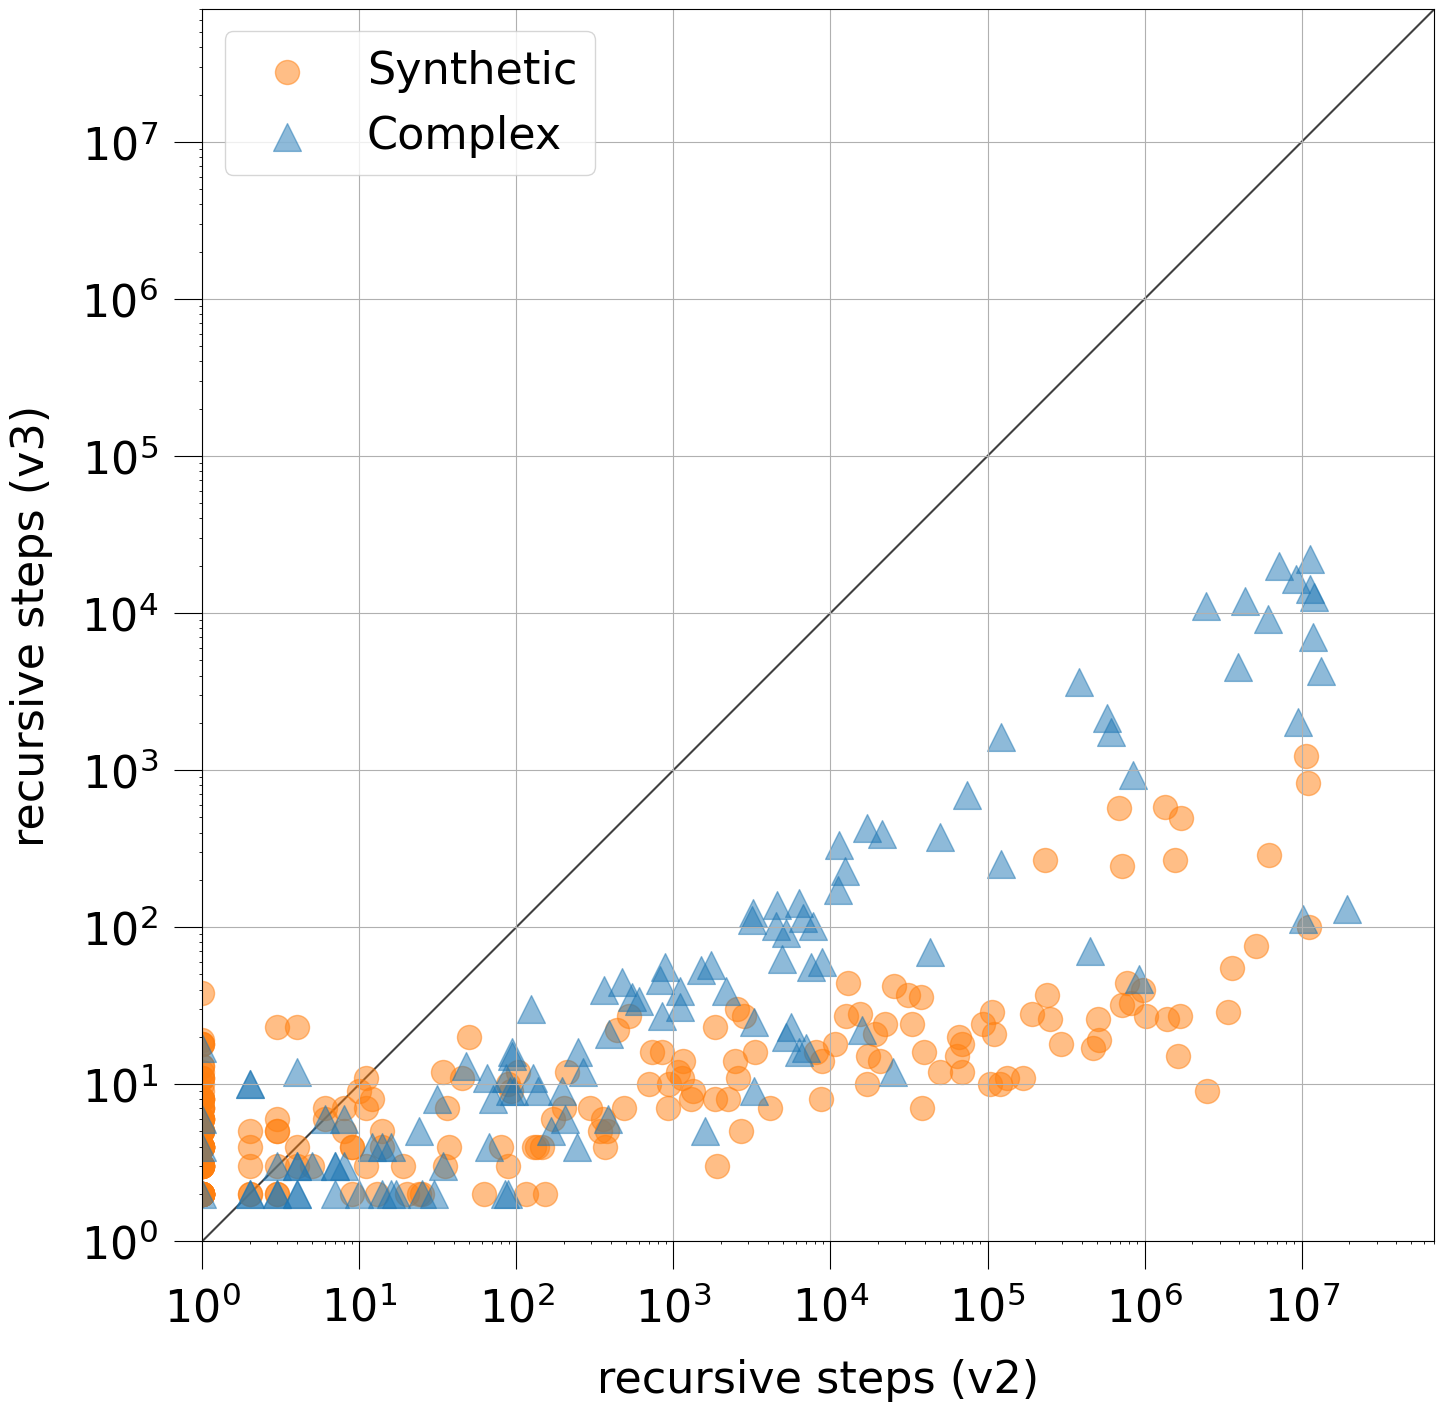

In [6]:
df_merge = df0.merge(df1, on='name', how='inner')
df_merge = df_merge[df_merge['verified_x'] == True]
df_merge = df_merge[df_merge['verified_y'] == True]
df_merge_synthetic, df_merge_complex = split_synthetic_complex(df_merge)

fig, ax = plt.subplots(figsize=(16, 16))
ax.scatter(df_merge_synthetic['recursive_steps_x'], df_merge_synthetic['recursive_steps_y'], c='tab:orange', marker='o', alpha=0.5, s=300, label='Synthetic')
ax.scatter(df_merge_complex['recursive_steps_x'], df_merge_complex['recursive_steps_y'], c='tab:blue', marker='^', alpha=0.5, s=400, label='Complex')

ax.set_xlabel('optimal k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1, 70000000])
ax.set_ylim([1, 70000000])
ax.set_xlabel('recursive steps (v2)', labelpad=20)
ax.set_ylabel('recursive steps (v3)', labelpad=20)
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.legend()
ax.grid()

# diagonal line
x = np.array([1,70000000])
y = np.array([1,70000000])
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

fig.savefig('plots/v3/ScatterPlotV2V3.png',  bbox_inches='tight')
fig.show()

# Reduction Rules Percentage Graph

Dataframe contains 661 elements
Dataframe contains 661 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_7324/3491924810.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


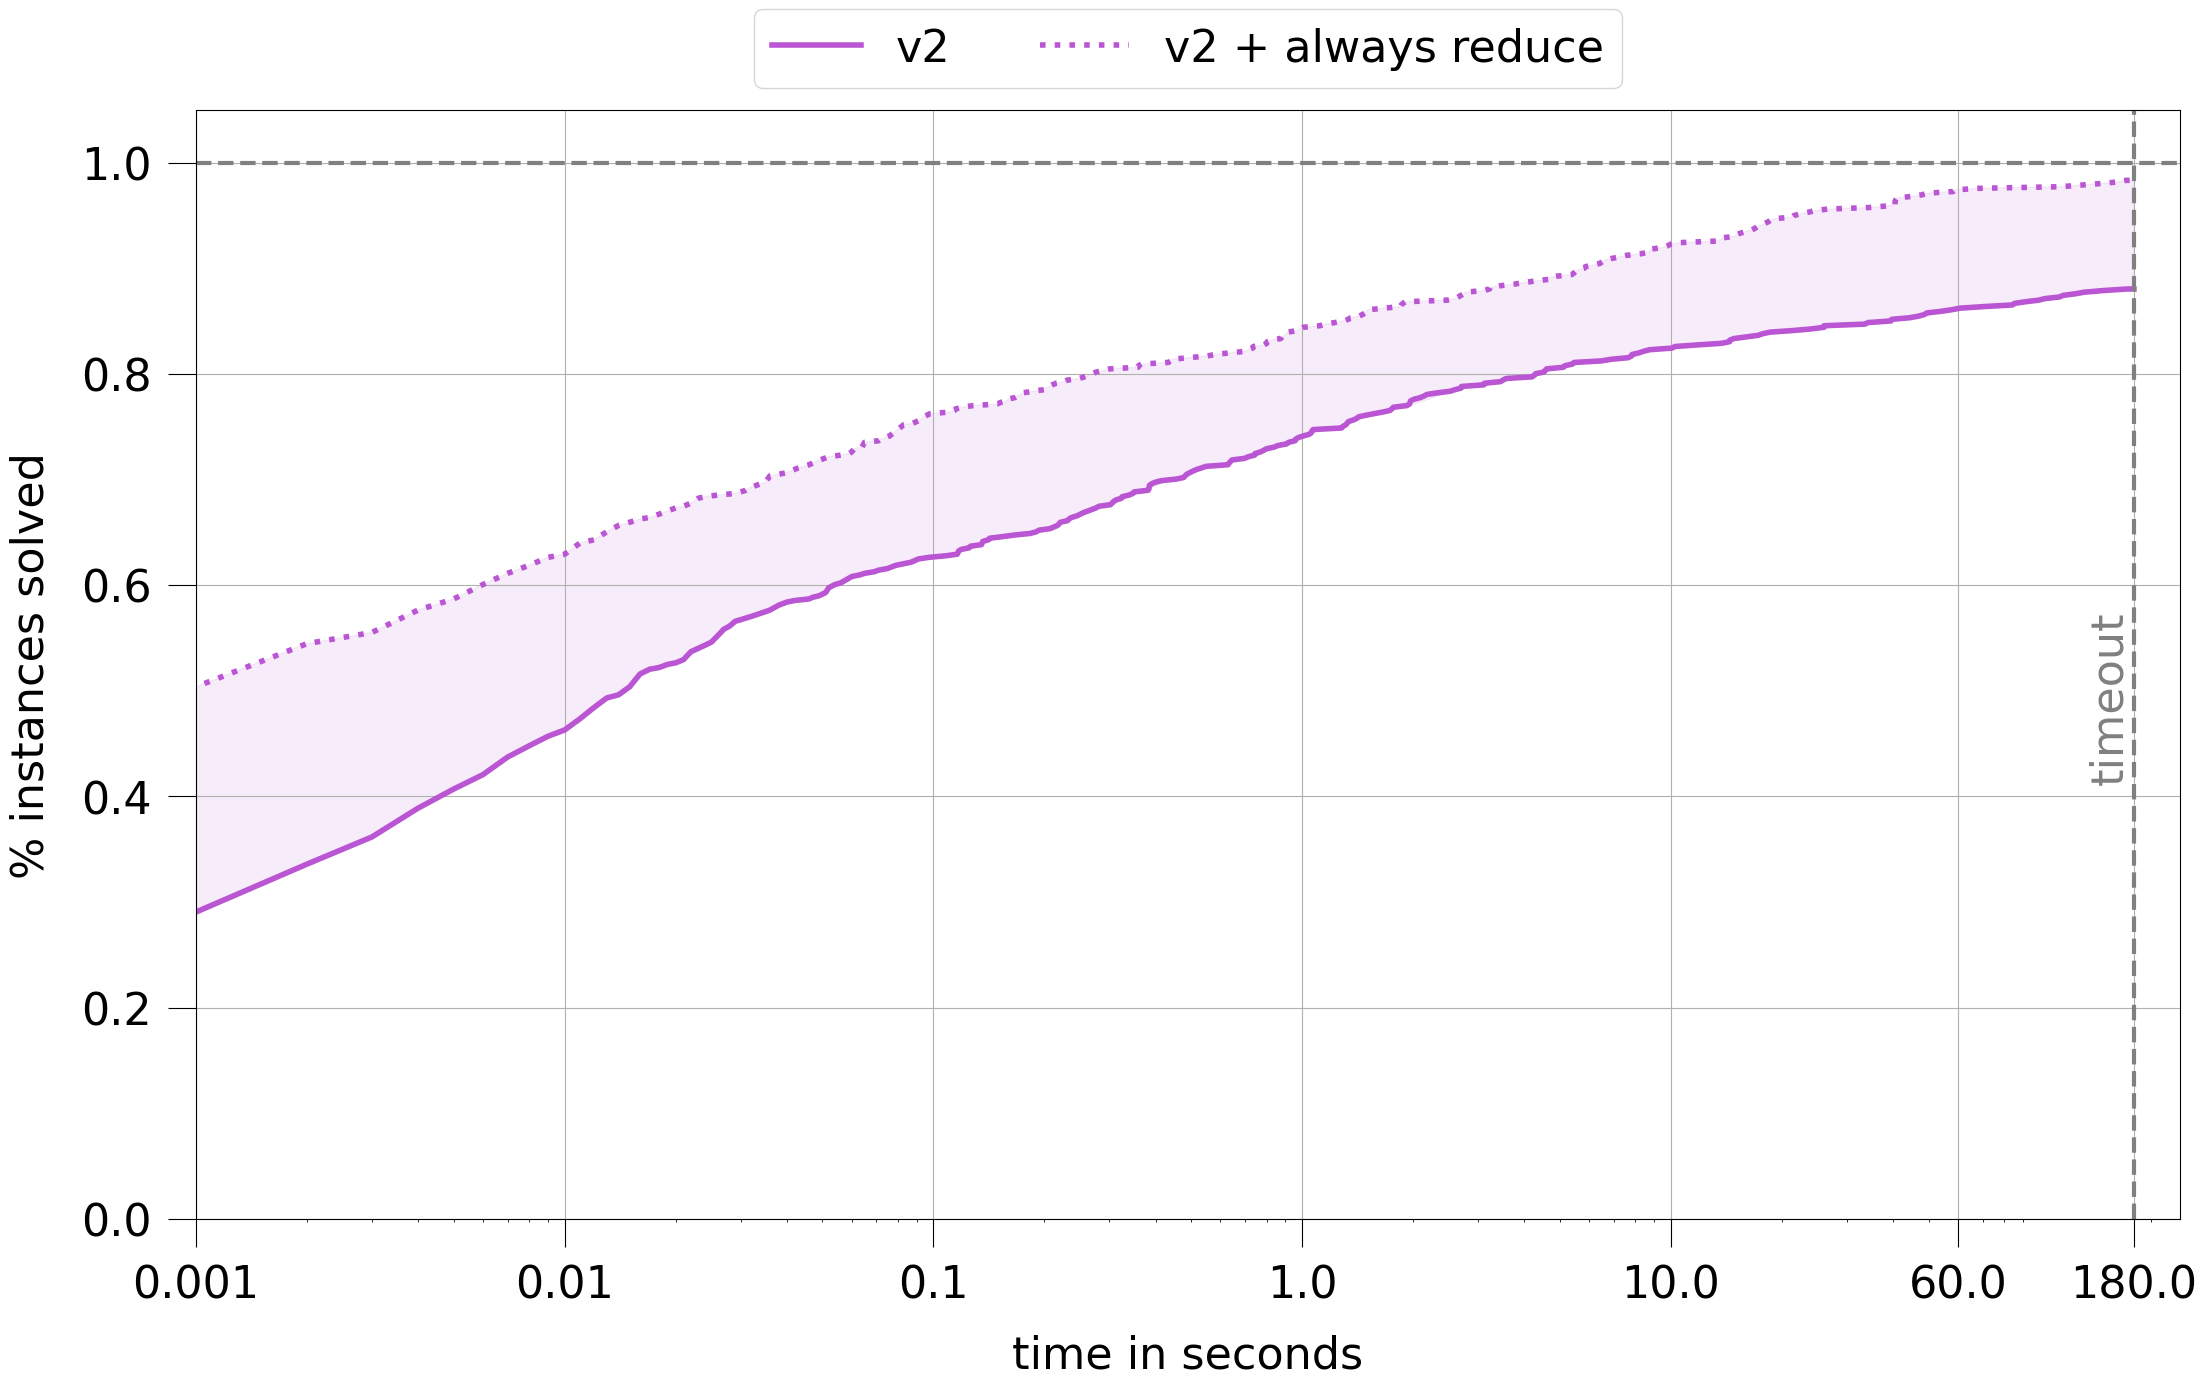

In [7]:
# Calculate percentage dataframes
df4_perc = get_percentage_df(df4)
df0_perc = get_percentage_df(df0)

# Add percentage values (for the area between curves)
df4_perc = add_percentage_df(df4_perc, df0)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df0_perc['percentage_solved'], c='mediumorchid', linewidth='4', label='v2')
ax.plot(df4_perc['percentage_solved'], c='mediumorchid', linestyle=':', linewidth='4', label='v2 + always reduce')
# Fill area between cruves
ax.fill_between(df4_perc.index, df4_perc['percentage_solved'], df4_perc['percentage_solved_y'], color='mediumorchid', alpha=0.1)

ax.set_xlabel('time in seconds', labelpad=20)
ax.set_ylabel('% instances solved', labelpad=20)
ax.set_xlim([1, 240000])
ax.set_ylim([0, 1.05])
ax.set_xscale('log')
ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
ax.text(135000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v3/LinePlotReduction.png',  bbox_inches='tight')
fig.show()

# Packing Percentage Graph

Dataframe contains 315 elements
Dataframe contains 137 elements
Dataframe contains 315 elements
Dataframe contains 137 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_7324/2619146203.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


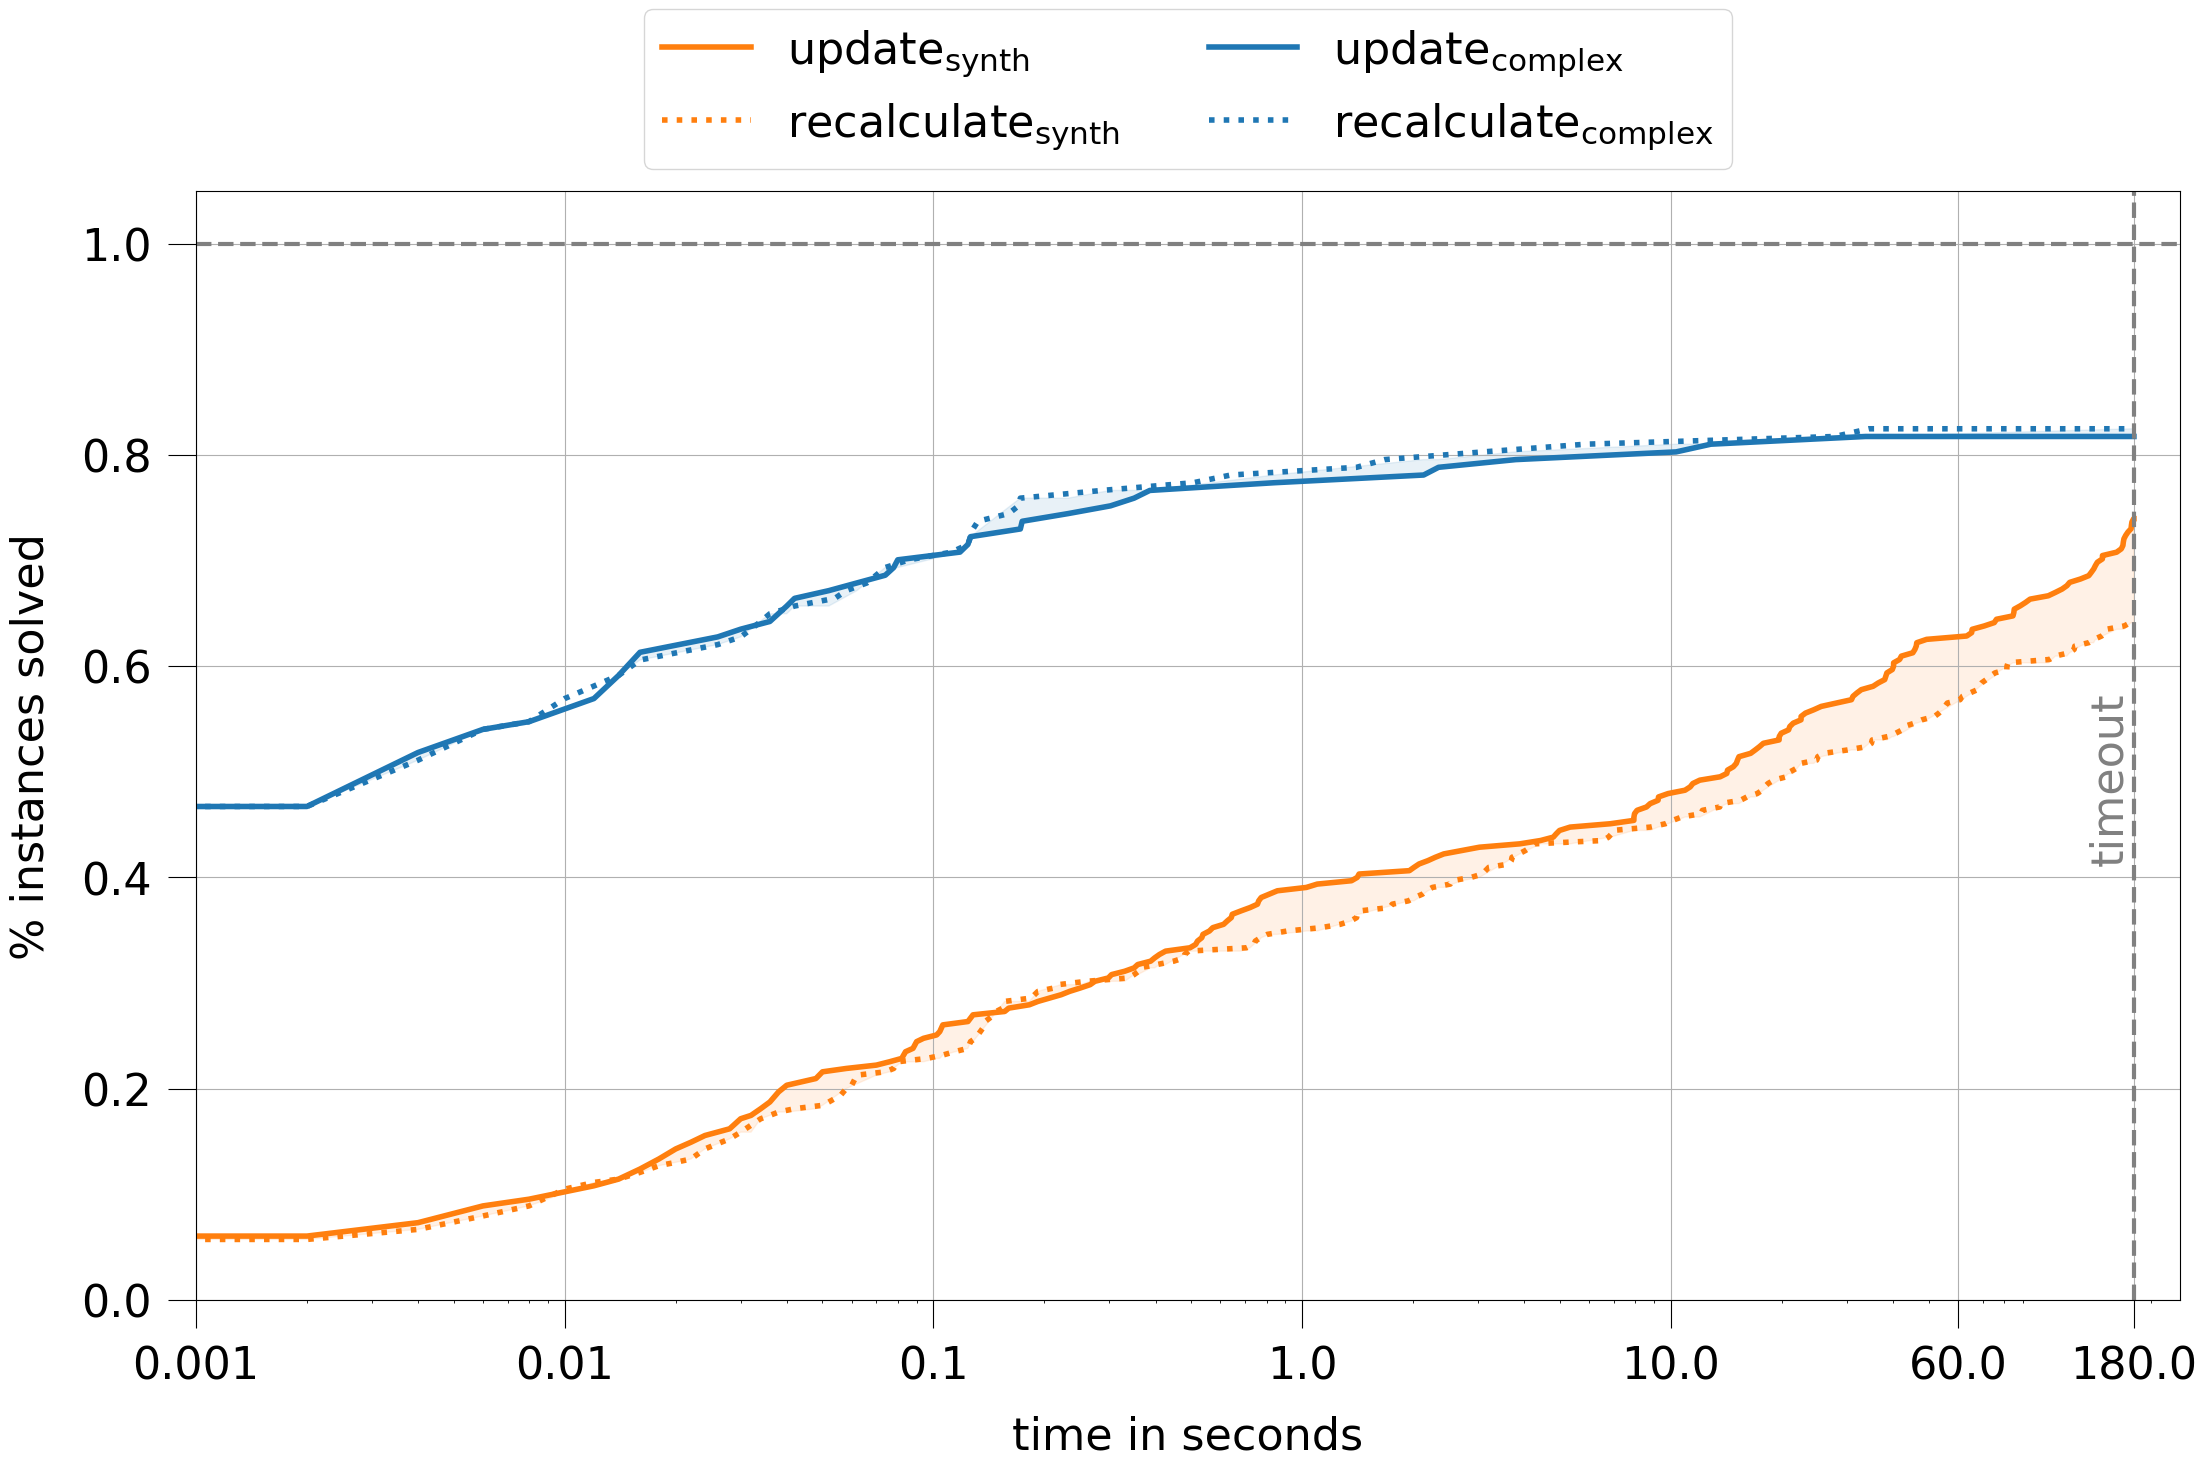

In [8]:
df2_synthetic, df2_complex = split_synthetic_complex(df2)
df3_synthetic, df3_complex = split_synthetic_complex(df3)

# Calculate percentage dataframes
df2_synthetic_perc = get_percentage_df(df2_synthetic)
df2_complex_perc = get_percentage_df(df2_complex)
df3_synthetic_perc = get_percentage_df(df3_synthetic)
df3_complex_perc = get_percentage_df(df3_complex)

# Add percentage values (for the area between curves)
df2_synthetic_perc = add_percentage_df(df2_synthetic_perc, df3_synthetic)
df2_complex_perc = add_percentage_df(df2_complex_perc, df3_complex)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df2_synthetic_perc['percentage_solved'], c='tab:orange', linewidth='4', label='$update_{synth}$')
ax.plot(df3_synthetic_perc['percentage_solved'], c='tab:orange', linestyle=':', linewidth='4', label='$recalculate_{synth}$')
ax.plot(df2_complex_perc['percentage_solved'], c='tab:blue', linewidth='4', label='$update_{complex}$')
ax.plot(df3_complex_perc['percentage_solved'], c='tab:blue', linestyle=':', linewidth='4', label='$recalculate_{complex}$')
# Fill area between curves
ax.fill_between(df2_synthetic_perc.index, df2_synthetic_perc['percentage_solved'], df2_synthetic_perc['percentage_solved_y'], color='tab:orange', alpha=0.1)
ax.fill_between(df2_complex_perc.index, df2_complex_perc['percentage_solved'], df2_complex_perc['percentage_solved_y'], color='tab:blue', alpha=0.1)

ax.set_xlabel('time in seconds', labelpad=20)
ax.set_ylabel('% instances solved', labelpad=20)
ax.set_xlim([1, 240000])
ax.set_ylim([0, 1.05])
ax.set_xscale('log')
ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
ax.text(135000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v3/LinePlotPacking.png',  bbox_inches='tight')
fig.show()

# Packing Recursive Calls Scatter Plot

C:\Users\lenna\AppData\Local\Temp/ipykernel_7324/3664192668.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


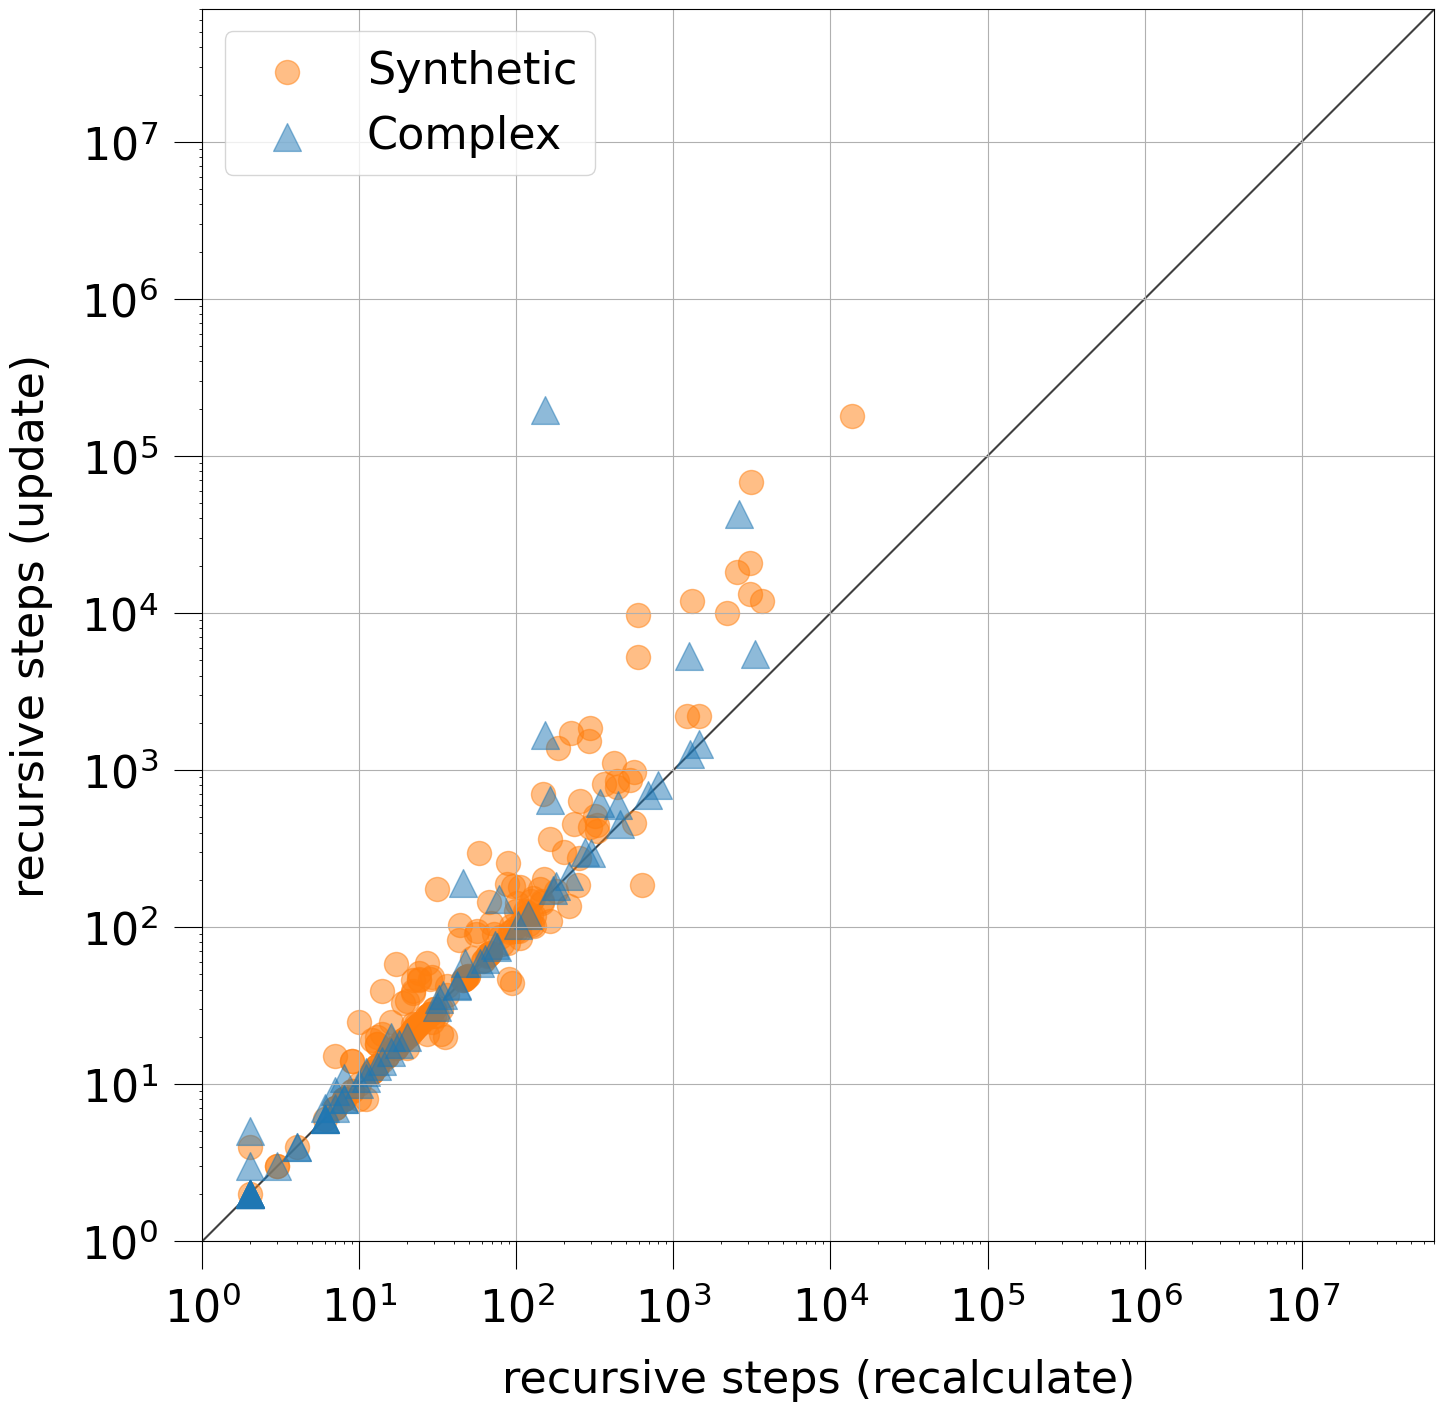

In [9]:
df_merge = df3.merge(df2, on='name', how='inner')
df_merge = df_merge[df_merge['verified_x'] == True]
df_merge = df_merge[df_merge['verified_y'] == True]
df_merge_synthetic, df_merge_complex = split_synthetic_complex(df_merge)

fig, ax = plt.subplots(figsize=(16, 16))
ax.scatter(df_merge_synthetic['recursive_steps_x'], df_merge_synthetic['recursive_steps_y'], c='tab:orange', marker='o', alpha=0.5, s=300, label='Synthetic')
ax.scatter(df_merge_complex['recursive_steps_x'], df_merge_complex['recursive_steps_y'], c='tab:blue', marker='^', alpha=0.5, s=400, label='Complex')

ax.set_xlabel('optimal k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1, 70000000])
ax.set_ylim([1, 70000000])
ax.set_xlabel('recursive steps (recalculate)', labelpad=20)
ax.set_ylabel('recursive steps (update)', labelpad=20)
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.legend()
ax.grid()

# diagonal line
x = np.array([1,70000000])
y = np.array([1,70000000])
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

fig.savefig('plots/v3/ScatterPlotPacking.png',  bbox_inches='tight')
fig.show()

# Box Plot Summary Synthetic

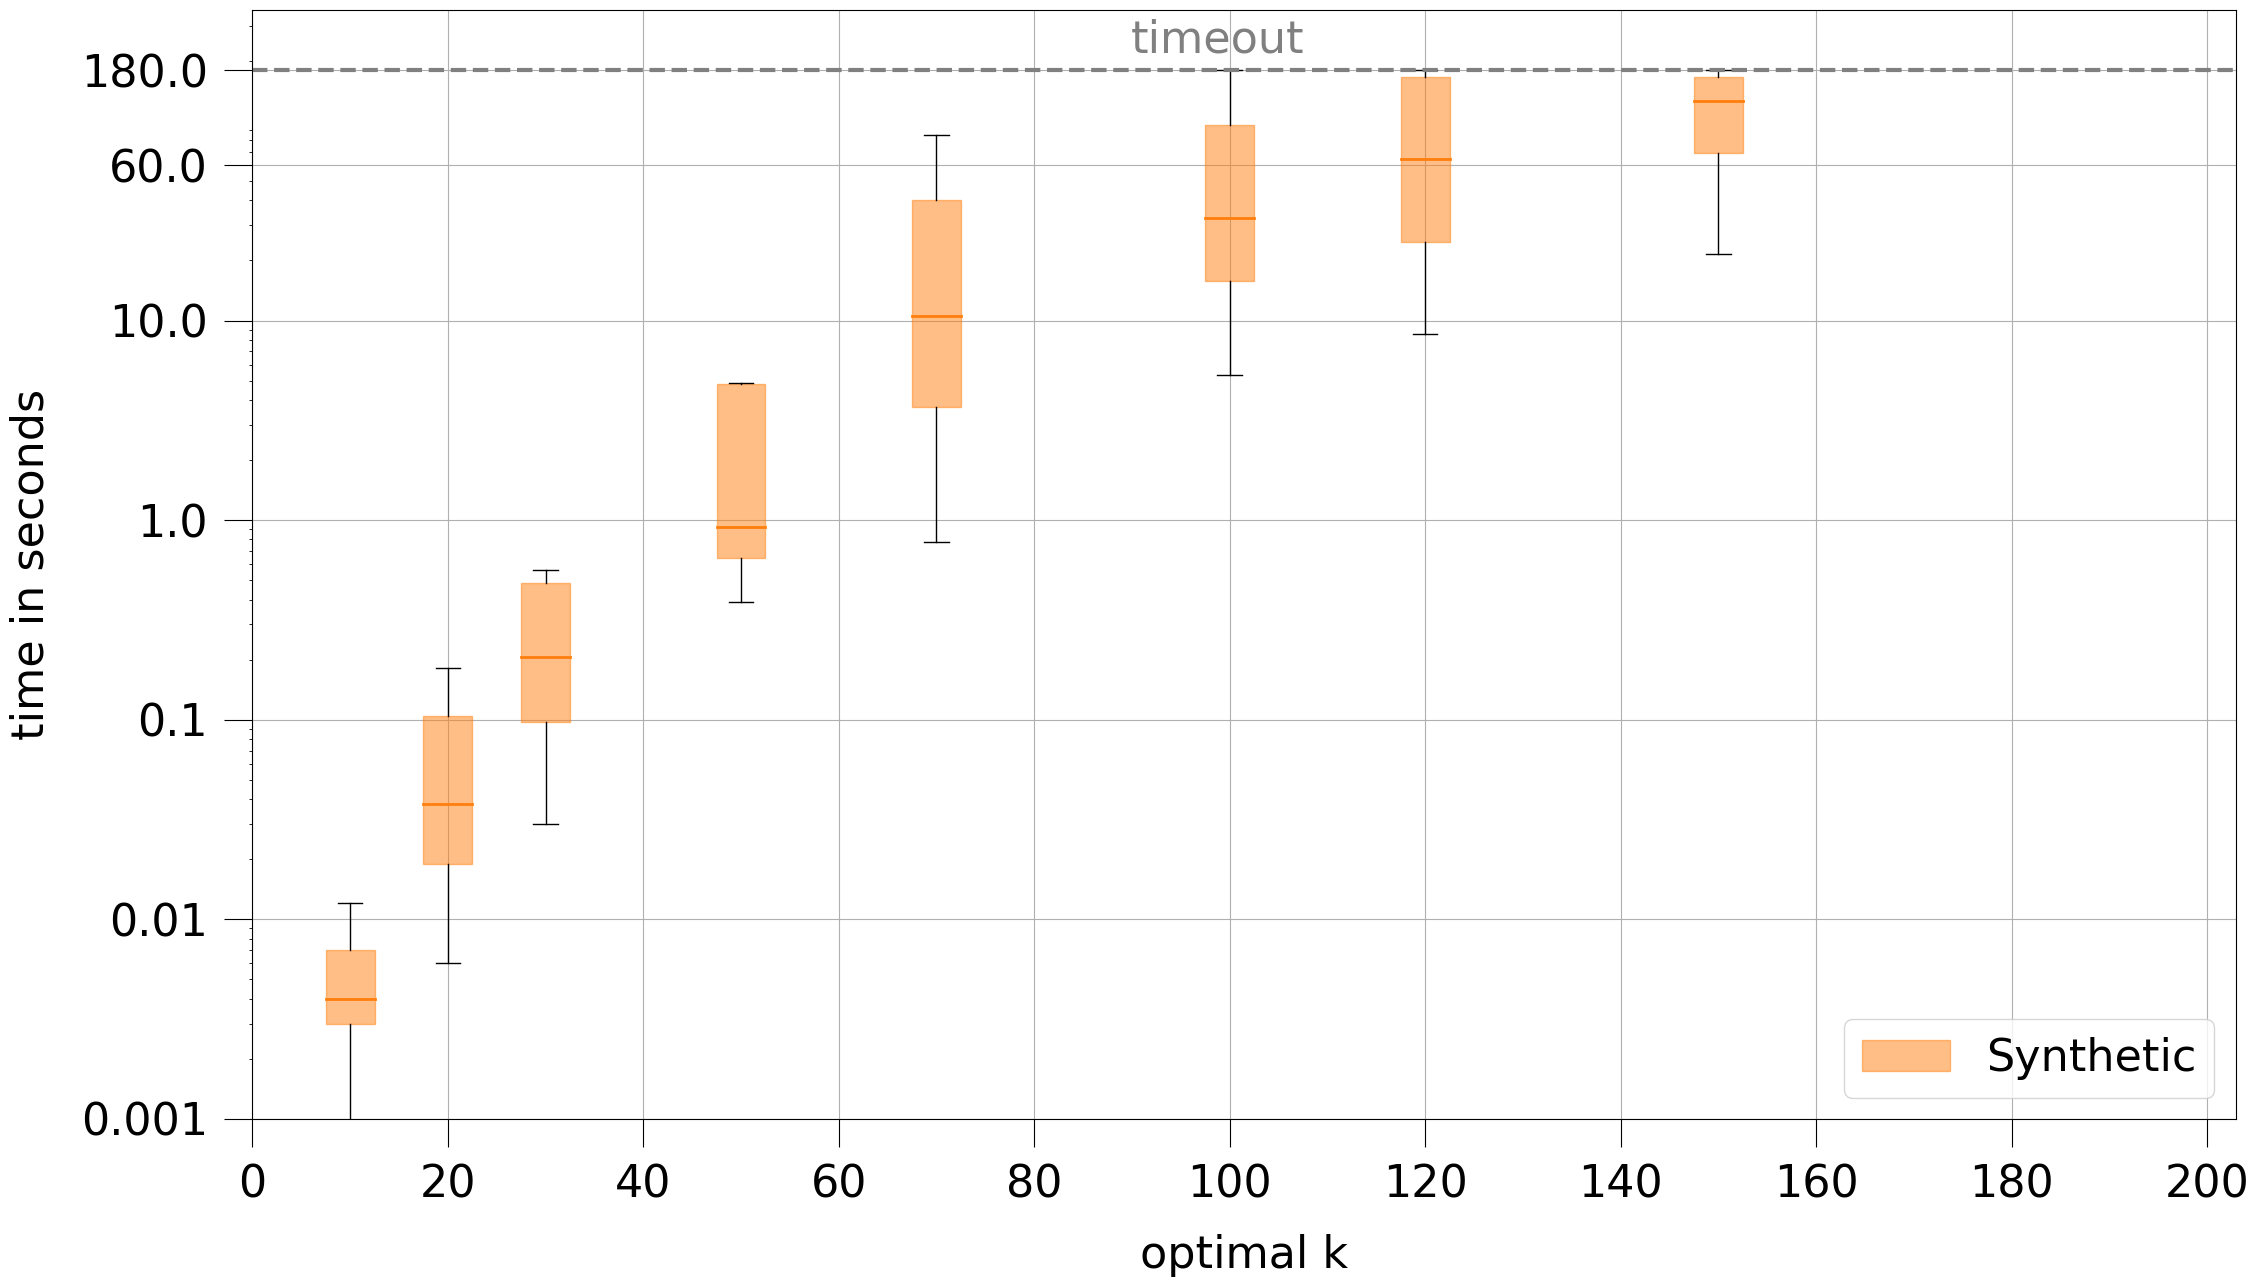

In [10]:
df2_synthetic, df2_complex = split_synthetic_complex(df2)

box_size = 2
synthetic_data = []
complex_data = []
synthetic_positions = []
complex_positions = []
labels = [0]
for i in range(0, 20):
    upper_k = i * 10
    lower_k = upper_k + 9

    df_filter = df2_synthetic[df2_synthetic['k_optimal'] == upper_k]
    df_filter.append(df2_synthetic[df2_synthetic['k_optimal'] == lower_k])
    synthetic_data.append(list(df_filter['millis']))
    synthetic_positions.append(upper_k)

    df_filter = df2_complex[df2_complex['k_optimal'] == upper_k]
    df_filter.append(df2_complex[df2_complex['k_optimal'] == lower_k])
    complex_data.append(list(df_filter['millis']))
    complex_positions.append(upper_k)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
bp1 = ax.boxplot(synthetic_data, positions = synthetic_positions, widths=5.0, patch_artist=True, medianprops=dict(color='tab:orange', linewidth=2), boxprops=dict(facecolor='tab:orange', color='tab:orange', alpha=0.5), showfliers=False)
ax.set_xlabel('optimal k', labelpad=20)
ax.set_ylabel('time in seconds', labelpad=20)
ax.set_xlim([0, 203])
ax.set_ylim([1, 360000])
ax.set_yscale('log')
ax.set_xticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200])
ax.set_xticklabels([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200])
ax.set_yticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_yticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend([bp1["boxes"][0]], ['Synthetic'], bbox_to_anchor=(0, 0.11, 1, 0))

# Draw
ax.axhline(y=180000, color='gray', linestyle='--', linewidth=3)
ax.text(89.9, 220000, "timeout", color='gray')

fig.savefig('plots/v3/BoxPlotSummarySynthetic.png',  bbox_inches='tight')

# Scatter Plot Summary Complex

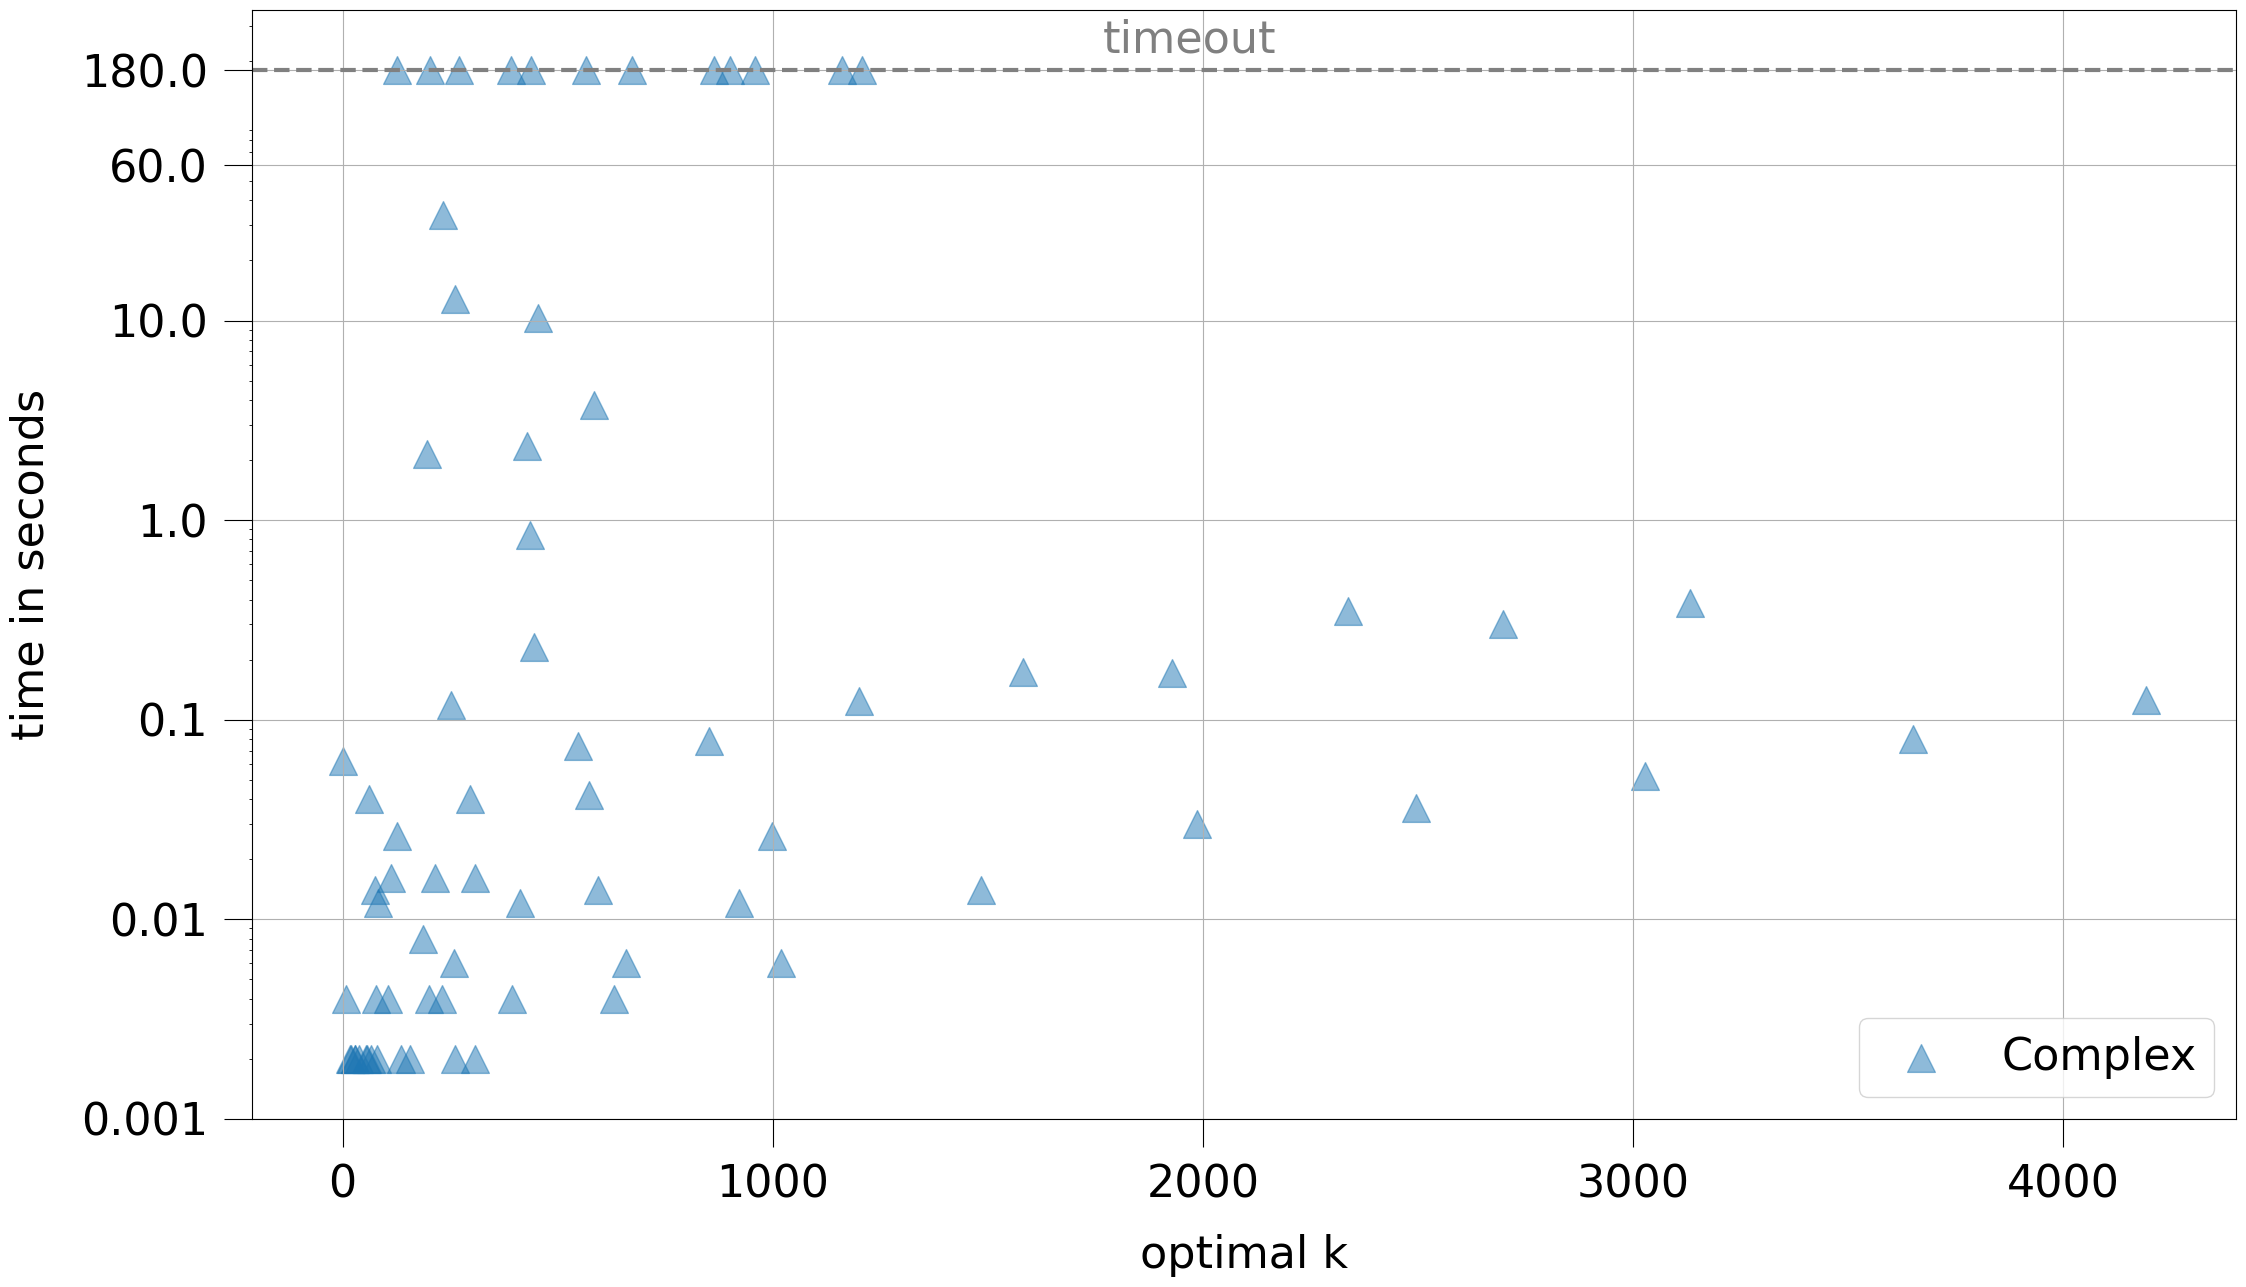

In [11]:
df2_synthetic, df2_complex = split_synthetic_complex(df2)
df2_complex = df2_complex[df2_complex['k_optimal'] >= 0]
# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.scatter(df2_complex['k_optimal'], df2_complex['millis'], c='tab:blue', marker='^', alpha=0.5, s=400, label='Complex')

ax.set_xlabel('optimal k', labelpad=20)
ax.set_ylabel('time in seconds', labelpad=20)
#ax.set_xlim([0, 203])
ax.set_ylim([1, 360000])
ax.set_yscale('log')
#ax.set_xticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200])
#ax.set_xticklabels([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200])
ax.set_yticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_yticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend()

# Draw
ax.axhline(y=180000, color='gray', linestyle='--', linewidth=3)
ax.text(1767, 220000, "timeout", color='gray')

fig.savefig('plots/v3/ScatterPlotSummaryComplex.png',  bbox_inches='tight')